Case Study: "Underwriter for a Day"

Tejas Bajaj 11308438  Q3&Q4b

Haotong Sun 11337172 Q2&Q4a

Yilun Yang 11313432 Q1&Q4b


Generative AI is used to assistant programming

#  Risk Group Assignment Algorithm: Develop an algorithm for categorizing new applicants into specific risk groups based on their individual characteristics.

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [187]:
# Load your dataset
claim_data = pd.read_csv('claim_data_group5_2024.csv')

In [188]:
claim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   IDpol        100000 non-null  float64
 1   ClaimNb      100000 non-null  float64
 2   Exposure     100000 non-null  float64
 3   Area         100000 non-null  object 
 4   VehPower     100000 non-null  float64
 5   VehAge       100000 non-null  float64
 6   DrivAge      100000 non-null  float64
 7   BonusMalus   100000 non-null  float64
 8   VehBrand     100000 non-null  object 
 9   VehGas       100000 non-null  object 
 10  Density      100000 non-null  float64
 11  Region       100000 non-null  object 
 12  ClaimAmount  100000 non-null  float64
dtypes: float64(9), object(4)
memory usage: 9.9+ MB


In [189]:
claim_data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,2271893.0,0.0,0.83,E,5.0,17.0,53.0,64.0,B2,Diesel,3317.0,R93,0.0
1,1111864.0,0.0,0.24,E,5.0,2.0,27.0,64.0,B3,Diesel,2740.0,R22,0.0
2,72908.0,0.0,0.50,E,7.0,11.0,67.0,50.0,B3,Regular,4762.0,R93,0.0
3,2283027.0,0.0,0.08,B,5.0,8.0,28.0,60.0,B1,Diesel,64.0,R91,0.0
4,1123838.0,0.0,0.03,A,11.0,1.0,38.0,50.0,B2,Regular,16.0,R24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,70445.0,0.0,1.00,C,5.0,11.0,37.0,56.0,B2,Diesel,317.0,R82,0.0
99996,4163362.0,0.0,0.22,E,6.0,13.0,58.0,50.0,B1,Diesel,4762.0,R93,0.0
99997,2081912.0,0.0,1.00,E,5.0,1.0,49.0,50.0,B2,Diesel,4998.0,R11,0.0
99998,2012998.0,0.0,0.71,D,9.0,9.0,36.0,54.0,B1,Regular,1541.0,R91,0.0


In [190]:
# Descriptive Statistics for Numerical Columns
descriptive_stats = claim_data.describe()
descriptive_stats

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,2.617735e+06,0.039020,0.528057,6.460230,6.992550,45.483040,59.822980,1800.69569,76.599887
std,1.643394e+06,0.206296,0.364232,2.055641,5.637297,14.154698,15.652541,3955.08311,1531.841302
min,1.500000e+01,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,2.00000,0.000000
25%,1.156127e+06,0.000000,0.170000,5.000000,2.000000,34.000000,50.000000,94.00000,0.000000
50%,2.271008e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,399.00000,0.000000
75%,4.044791e+06,0.000000,0.990000,7.000000,11.000000,55.000000,65.000000,1658.00000,0.000000
max,6.114324e+06,4.000000,1.000000,15.000000,100.000000,99.000000,230.000000,27000.00000,200000.000000


In [191]:
# Analyzing unique values for categorical columns
categorical_overview = {
    "Area": claim_data["Area"].nunique(),
    "VehBrand": claim_data["VehBrand"].nunique(),
    "VehGas": claim_data["VehGas"].unique(),
    "Region": claim_data["Region"].nunique()
}
categorical_overview

{'Area': 6,
 'VehBrand': 11,
 'VehGas': array(['Diesel', 'Regular'], dtype=object),
 'Region': 22}

In [192]:
# Distribution of Individual Claims (ClaimNb)
claim_distribution = claim_data['ClaimNb'].value_counts()
claim_distribution

0.0    96335
1.0     3441
2.0      214
3.0        7
4.0        3
Name: ClaimNb, dtype: int64

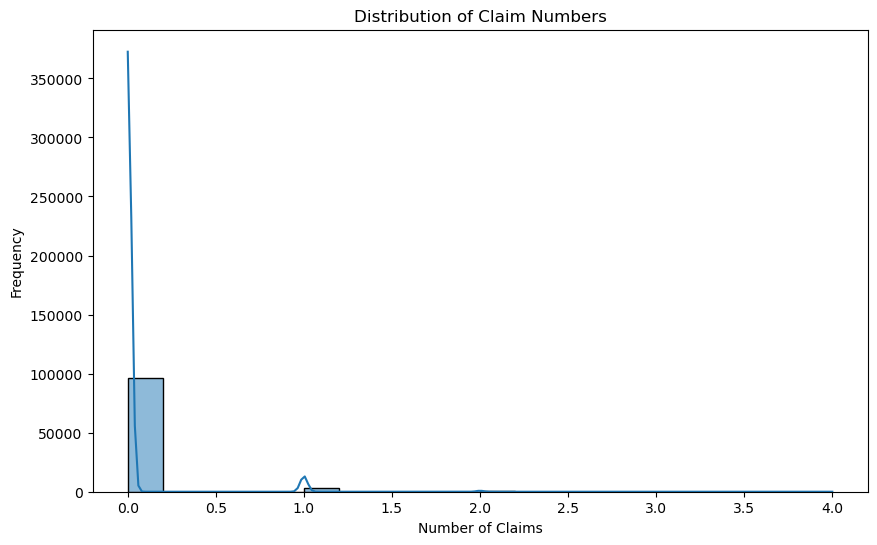

In [193]:
plt.figure(figsize=(10, 6))
sns.histplot(claim_data['ClaimNb'], bins=20, kde=True).set_title('Distribution of Claim Numbers')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.show()

In [194]:
# Distribution of Claim Amounts (ClaimAmount)
claim_amount_distribution = claim_data['ClaimAmount'].value_counts()
claim_amount_distribution

0.00       96335
1204.00      649
1128.12      398
1172.00      282
1128.00       96
           ...  
2487.55        1
1307.64        1
1858.81        1
741.77         1
1117.64        1
Name: ClaimAmount, Length: 1938, dtype: int64

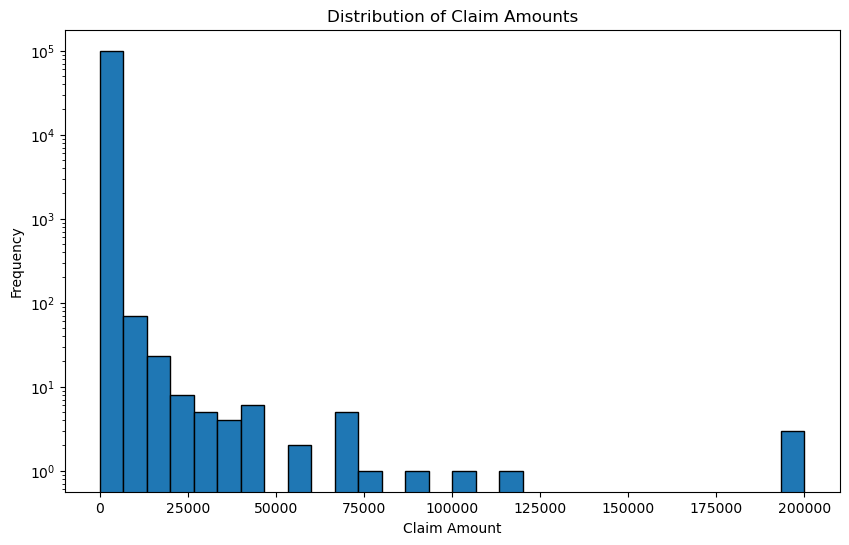

In [195]:
plt.figure(figsize=(10, 6))
plt.hist(claim_data['ClaimAmount'], bins=30, edgecolor='black')
plt.title("Distribution of Claim Amounts")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.yscale('log')  # Using log scale due to likely skew in claim amounts
plt.show()

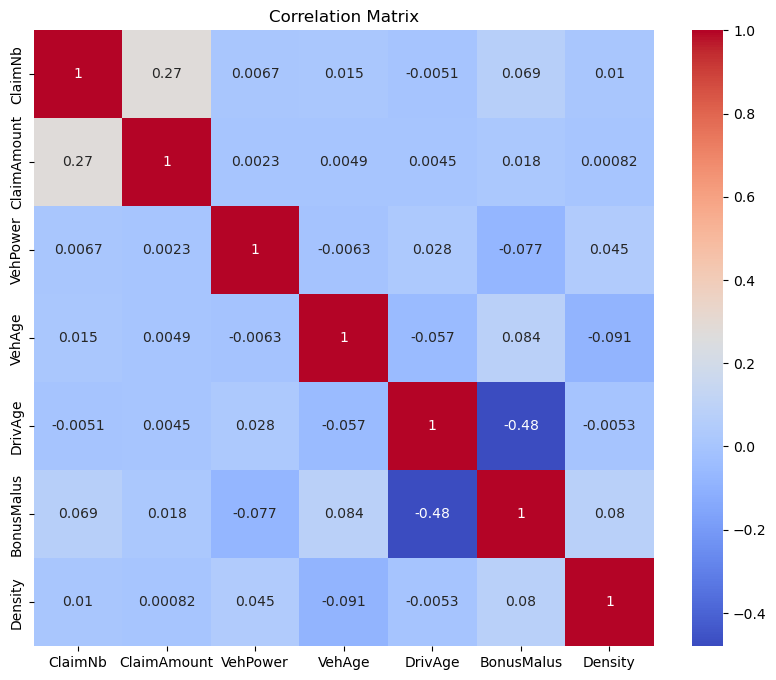

In [196]:
# Correlation matrix for numerical features
correlation_matrix = claim_data[['ClaimNb', 'ClaimAmount', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [197]:
claim_data['VehGas_binary'] = claim_data['VehGas'].apply(lambda x: 1 if x == 'Regular' else 0)
X = sm.add_constant(claim_data[['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehGas_binary', 'Density']])

In [198]:
poisson_model_ClaimNb = sm.GLM(claim_data['ClaimNb'], X, family=sm.families.Poisson()).fit()
poisson_model_ClaimNb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ClaimNb   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99993
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16438.
Date:                Thu, 14 Nov 2024   Deviance:                       25404.
Time:                        13:27:04   Pearson chi2:                 1.08e+05
No. Iterations:                     7   Pseudo R-squ. (CS):           0.005804
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.3395      0.110    -48.378      0.000      -5.556      -5.123
VehPower          0.0267      0.008      3.453      0.001       0.012       0.042
VehAge            0.0119      0.003      4.315      0.000       0.007       0.017
DrivAge           0.0117      0.001      9.786      0.000       0.009       0.014
BonusMalus        0.0222      0.001     25.359      0.000       0.020       0.024
VehGas_binary    -0.1793      0.033     -5.484      0.000      -0.243      -0.115
Density        7.071e-06   3.76e-06      1.879      0.060   -3.05e-07    1.44e-05
=================================================================================
"""

In [199]:
poisson_model_ClaimAmount = sm.GLM(claim_data['ClaimAmount'], X, family=sm.families.Poisson()).fit()
poisson_model_ClaimAmount.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            ClaimAmount   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99993
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.3164e+07
Date:                Thu, 14 Nov 2024   Deviance:                   6.6297e+07
Time:                        13:27:05   Pearson chi2:                 2.62e+09
No. Iterations:                     9   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6086      0.002    674.794      0.000       1.604       1.613
VehPower          0.0340      0.000    198.042      0.000       0.034       0.034
VehAge            0.0124   6.17e-05    200.781      0.000       0.012       0.013
DrivAge           0.0196   2.55e-05    770.143      0.000       0.020       0.020
BonusMalus        0.0245   1.86e-05   1318.030      0.000       0.024       0.025
VehGas_binary    -0.0091      0.001    -12.358      0.000      -0.011      -0.008
Density       -4.721e-06   9.21e-08    -51.278      0.000    -4.9e-06   -4.54e-06
=================================================================================
"""

## Approach

This approach adjusts the average claim amount by the claim frequency, thus providing a frequency-adjusted severity score:

Adjusted Risk = (Total Claim Amount for Category / Total Vehicles in Category) 
                    * (Total Claims for Category / Total Vehicles in Category)

This formula multiplies the average claim amount by the average claim frequency for each category, thus combining the two into a single risk measure.


In [200]:
# Step 1: Calculate combined risk for each characteristic
def combined_risk(df, category_col):
    category_risk = df.groupby(category_col).agg(
        TotalClaimAmount=('ClaimAmount', 'sum'),
        TotalClaims=('ClaimNb', 'sum'),
        TotalVehicles=('IDpol', 'count')
    )
    category_risk['AvgClaimAmount'] = category_risk['TotalClaimAmount'] / category_risk['TotalVehicles']
    category_risk['AvgClaimFrequency'] = category_risk['TotalClaims'] / category_risk['TotalVehicles']
    category_risk['CombinedRisk'] = category_risk['AvgClaimAmount'] * category_risk['AvgClaimFrequency']
    return category_risk.reset_index()

In [201]:
vehpower_combined_risk = combined_risk(claim_data, 'VehPower')
vehpower_combined_risk

,VehPower,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
0,4.0,994335.45,529.0,17007,58.466246,0.031105,1.818583
1,5.0,1523507.54,764.0,18372,82.925514,0.041585,3.448459
2,6.0,1862209.18,929.0,21746,85.634562,0.042721,3.658351
3,7.0,1591878.39,849.0,21629,73.599260,0.039253,2.888981
4,8.0,518985.02,257.0,7004,74.098375,0.036693,2.718915
5,9.0,340514.78,194.0,4449,76.537375,0.043605,3.337436
6,10.0,407308.33,157.0,4608,88.391565,0.034071,3.011605
7,11.0,191014.30,112.0,2675,71.407215,0.041869,2.989760
8,12.0,158011.39,57.0,1215,130.050527,0.046914,6.101136
9,13.0,23730.53,22.0,489,48.528691,0.044990,2.183295


In [202]:
vehpower_combined_risk.describe()

,VehPower,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
count,12.000000,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000
mean,9.500000,6.383324e+05,325.166667,8333.333333,75.902330,0.040305,3.090882
std,3.605551,6.766533e+05,346.895539,8704.346661,20.897283,0.005070,1.104016
min,4.000000,2.226311e+04,16.000000,349.000000,48.528691,0.031105,1.818583
25%,6.750000,1.250662e+05,48.250000,1033.500000,62.459921,0.036273,2.585010
50%,9.500000,3.739116e+05,175.500000,4528.500000,73.848818,0.041727,2.957141
75%,12.250000,1.126628e+06,587.750000,17348.250000,83.602776,0.043951,3.365191
max,15.000000,1.862209e+06,929.000000,21746.000000,130.050527,0.046914,6.101136


In [203]:
def score_vehicle_power_combined(veh_power):
    combined_risk = vehpower_combined_risk.loc[vehpower_combined_risk['VehPower'] == veh_power, 'CombinedRisk'].values[0]
    if combined_risk < 2.5:
        return 1  # Low risk
    elif 2.5 <= combined_risk < 3.5:
        return 2  # Moderate risk
    else:
        return 3  # High risk

In [204]:
vehage_combined_risk = combined_risk(claim_data, 'VehAge')
vehage_combined_risk

,VehAge,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
0,0.0,410632.54,167.0,8535,48.111604,0.019566,0.941375
1,1.0,605801.74,326.0,10771,56.243779,0.030266,1.702300
2,2.0,776033.31,335.0,8758,88.608508,0.038251,3.389341
3,3.0,508193.74,288.0,7386,68.805001,0.038993,2.682892
4,4.0,441865.37,267.0,6446,68.548770,0.041421,2.839361
5,5.0,384044.79,227.0,5639,68.105123,0.040255,2.741597
6,6.0,351768.86,219.0,5316,66.171719,0.041196,2.726036
7,7.0,395305.52,240.0,4932,80.151160,0.048662,3.900300
8,8.0,378182.60,227.0,4858,77.847386,0.046727,3.637579
9,9.0,604026.97,254.0,4728,127.755281,0.053723,6.863334


In [205]:
vehage_combined_risk.describe()

,VehAge,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,29.370370,141851.642037,72.259259,1851.851852,35.667819,0.020215,1.443160
std,21.971076,219026.549630,107.643224,2832.454802,41.820550,0.020023,1.885333
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,13.250000,0.000000,0.000000,4.250000,0.000000,0.000000,0.000000
50%,26.500000,1290.910000,1.500000,54.000000,26.090490,0.023357,0.665693
75%,39.750000,272079.795000,159.250000,3858.000000,66.702736,0.039151,2.715250
max,100.000000,776033.310000,335.000000,10771.000000,167.445270,0.053723,7.532464


In [206]:
def score_vehicle_age_combined(veh_age):
    combined_risk = vehage_combined_risk.loc[vehage_combined_risk['VehAge'] == veh_age, 'CombinedRisk'].values[0]
    if combined_risk < 0.5:
        return 1  # Low risk
    elif 0.5 <= combined_risk < 2.5:
        return 2  # Moderate risk
    else:
        return 3  # High risk

In [207]:
age_combined_risk = combined_risk(claim_data, 'DrivAge')
age_combined_risk

,DrivAge,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
0,18.0,211932.67,6.0,120,1766.105583,0.050000,88.305279
1,19.0,82079.72,30.0,354,231.863616,0.084746,19.649459
2,20.0,91491.80,55.0,552,165.746014,0.099638,16.514549
3,21.0,87797.24,42.0,639,137.397872,0.065728,9.030846
4,22.0,113956.44,58.0,799,142.623830,0.072591,10.353169
...,...,...,...,...,...,...,...
76,94.0,0.00,0.0,2,0.000000,0.000000,0.000000
77,95.0,1172.00,1.0,2,586.000000,0.500000,293.000000
78,96.0,0.00,0.0,5,0.000000,0.000000,0.000000
79,97.0,0.00,0.0,1,0.000000,0.000000,0.000000


In [208]:
age_combined_risk.describe()

,DrivAge,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,58.012346,94567.761358,48.172840,1234.567901,123.406381,0.047571,9.421084
std,23.548086,72047.799236,36.172085,976.328991,265.678005,0.054531,34.769793
min,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,38.000000,22997.700000,13.000000,308.000000,45.958032,0.033386,1.644884
50%,58.000000,101496.590000,45.000000,985.000000,68.367546,0.037641,2.822222
75%,78.000000,133475.360000,81.000000,2405.000000,93.798637,0.049608,4.416568
max,99.000000,275891.400000,116.000000,2585.000000,1766.105583,0.500000,293.000000


In [209]:
def score_driver_age_combined(driver_age):
    combined_risk = age_combined_risk.loc[age_combined_risk['DrivAge'] == driver_age, 'CombinedRisk'].values[0]
    if combined_risk < 1.5:
        return 1  # Low risk
    elif 1.5 <= combined_risk < 4.5:
        return 2  # Moderate risk
    else:
        return 3  # High risk

In [210]:
bonusmalus_combined_risk = combined_risk(claim_data, 'BonusMalus')
bonusmalus_combined_risk

,BonusMalus,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
0,50.0,3650556.48,1694.0,56384,64.744546,0.030044,1.945184
1,51.0,57993.15,59.0,2307,25.137906,0.025574,0.642885
2,52.0,51447.90,28.0,724,71.060635,0.038674,2.748201
3,53.0,19397.49,18.0,504,38.487083,0.035714,1.374539
4,54.0,125119.17,63.0,2558,48.912889,0.024629,1.204657
...,...,...,...,...,...,...,...
89,190.0,0.00,0.0,1,0.000000,0.000000,0.000000
90,195.0,0.00,0.0,1,0.000000,0.000000,0.000000
91,196.0,0.00,0.0,1,0.000000,0.000000,0.000000
92,198.0,0.00,0.0,1,0.000000,0.000000,0.000000


In [211]:
bonusmalus_combined_risk.describe()

,BonusMalus,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
count,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000
mean,103.638298,8.148924e+04,41.510638,1063.829787,179.650817,0.118077,80.762267
std,39.911690,3.818784e+05,176.960159,5836.763855,358.211801,0.193176,339.211724
min,50.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,73.250000,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000
50%,96.500000,5.763840e+03,3.500000,27.000000,81.260228,0.053875,3.996637
75%,121.500000,5.157968e+04,28.750000,303.000000,197.499748,0.142231,29.138891
max,230.000000,3.650556e+06,1694.000000,56384.000000,2871.455000,1.000000,2871.455000


In [212]:
def score_bonus_malus(bonus_malus):
    if bonus_malus < 100:
        return 1  # Low risk
    else:
        return 3  # High risk

In [213]:
vehgas_combined_risk = combined_risk(claim_data, 'VehGas_binary')
vehgas_combined_risk

,VehGas_binary,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
0,0,3616077.25,2020.0,48973,73.838181,0.041247,3.045620
1,1,4043911.42,1882.0,51027,79.250425,0.036882,2.922949


In [214]:
vehgas_combined_risk.describe()

,VehGas_binary,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
count,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.500000,3.829994e+06,1951.000000,50000.000000,76.544303,0.039065,2.984284
std,0.707107,3.025244e+05,97.580736,1452.397329,3.827034,0.003086,0.086741
min,0.000000,3.616077e+06,1882.000000,48973.000000,73.838181,0.036882,2.922949
25%,0.250000,3.723036e+06,1916.500000,49486.500000,75.191242,0.037974,2.953616
50%,0.500000,3.829994e+06,1951.000000,50000.000000,76.544303,0.039065,2.984284
75%,0.750000,3.936953e+06,1985.500000,50513.500000,77.897364,0.040156,3.014952
max,1.000000,4.043911e+06,2020.000000,51027.000000,79.250425,0.041247,3.045620


In [215]:
def score_vehicle_gas_combined(veh_gas):
    combined_risk = vehgas_combined_risk.loc[vehgas_combined_risk['VehGas_binary'] == veh_gas, 'CombinedRisk'].values[0]
    if combined_risk < 2.5:
        return 1  # Low risk
    elif 2.5 <= combined_risk < 3:
        return 2  # Moderate risk
    else:
        return 3  # High risk

In [216]:
density_combined_risk = combined_risk(claim_data, 'Density')
density_combined_risk

,Density,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
0,2.0,354.53,1.0,16,22.158125,0.062500,1.384883
1,3.0,4467.55,2.0,60,74.459167,0.033333,2.481972
2,4.0,586.00,1.0,41,14.292683,0.024390,0.348602
3,5.0,0.00,0.0,50,0.000000,0.000000,0.000000
4,6.0,0.00,0.0,98,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
1563,21410.0,1204.00,1.0,8,150.500000,0.125000,18.812500
1564,22669.0,2995.63,4.0,79,37.919367,0.050633,1.919968
1565,22821.0,1204.00,1.0,24,50.166667,0.041667,2.090278
1566,23396.0,0.00,0.0,13,0.000000,0.000000,0.000000


In [217]:
density_combined_risk.describe()

,Density,TotalClaimAmount,TotalClaims,TotalVehicles,AvgClaimAmount,AvgClaimFrequency,CombinedRisk
count,1568.000000,1568.000000,1568.00000,1568.00000,1568.000000,1568.000000,1568.000000
mean,1765.789541,4885.196856,2.48852,63.77551,68.294893,0.037774,10.209962
std,2603.864600,15939.510556,5.24181,116.76733,215.730842,0.070501,74.176538
min,2.000000,0.000000,0.00000,1.00000,0.000000,0.000000,0.000000
25%,393.750000,0.000000,0.00000,9.00000,0.000000,0.000000,0.000000
50%,890.500000,797.475000,1.00000,24.00000,18.887042,0.021978,0.404789
75%,1987.750000,3769.552500,3.00000,62.25000,65.363351,0.052632,3.418263
max,27000.000000,250938.720000,67.00000,1526.00000,3570.021404,1.000000,1735.777778


In [218]:
def score_density_combined(density):
    combined_risk = density_combined_risk.loc[density_combined_risk['Density'] == density, 'CombinedRisk'].values[0]
    if combined_risk < 2.5:
        return 1  # Low risk
    elif 2.5 <= combined_risk < 3.5:
        return 2  # Moderate risk
    else:
        return 3  # High risk

In [219]:
# Step 3: Apply updated scoring functions to each row in claim_data
claim_data['VehiclePowerScore'] = claim_data['VehPower'].apply(score_vehicle_power_combined)
claim_data['VehicleAgeScore'] = claim_data['VehAge'].apply(score_vehicle_age_combined)
claim_data['DriverAgeScore'] = claim_data['DrivAge'].apply(score_driver_age_combined)
claim_data['VehicleGasScore'] = claim_data['VehGas_binary'].apply(score_vehicle_gas_combined)
claim_data['BonusMalusScore'] = claim_data['BonusMalus'].apply(score_bonus_malus_combined)
claim_data['DensityScore'] = claim_data['Density'].apply(score_density_combined)

In [221]:
# Calculate Combined Risk Score for each individual as the sum of individual scores
claim_data['CombinedRiskScore'] = claim_data[
    ['VehiclePowerScore', 'VehicleAgeScore', 'DriverAgeScore', 'VehicleGasScore', 'BonusMalusScore', 'DensityScore']
].sum(axis=1)

In [222]:
claim_data[['IDpol', 'VehiclePowerScore', 'VehicleAgeScore', 'DriverAgeScore', 'VehicleGasScore', 'BonusMalusScore', 'DensityScore', 'CombinedRiskScore']]

,IDpol,VehiclePowerScore,VehicleAgeScore,DriverAgeScore,VehicleGasScore,BonusMalusScore,DensityScore,CombinedRiskScore
0,2271893.0,2,3,2,3,1,3,14
1,1111864.0,2,3,2,3,1,3,14
2,72908.0,2,3,1,2,1,1,10
3,2283027.0,2,3,2,3,1,3,14
4,1123838.0,2,2,2,2,1,1,10
...,...,...,...,...,...,...,...,...
99995,70445.0,2,3,2,3,1,1,12
99996,4163362.0,3,3,1,3,1,1,12
99997,2081912.0,2,2,2,3,1,1,11
99998,2012998.0,2,3,1,2,1,1,10


In [223]:
# Count the occurrences of each unique CombinedRiskScore value
combined_risk_score_counts = claim_data['CombinedRiskScore'].value_counts().sort_index()

# Display the unique values and their counts
print("Unique CombinedRiskScore values and their counts:")
print(combined_risk_score_counts)

Unique CombinedRiskScore values and their counts:
7         1
8       417
9      3404
10    11675
11    21391
12    23876
13    19668
14    11461
15     5687
16     1751
17      574
18       95
Name: CombinedRiskScore, dtype: int64


In [224]:
def classify_combined_score(score):
    if score <= 10:
        return "Low Risk"
    elif 11 <= score <= 14:
        return "Moderate Risk"
    else:
        return "High Risk"

# Apply this classification to the CombinedRiskScore column
claim_data['RiskGroup'] = claim_data['CombinedRiskScore'].apply(classify_combined_score)

# Display the updated DataFrame with risk categories
print(claim_data[['IDpol', 'CombinedRiskScore', 'RiskGroup']])

           IDpol  CombinedRiskScore      RiskGroup
0      2271893.0                 14  Moderate Risk
1      1111864.0                 14  Moderate Risk
2        72908.0                 10       Low Risk
3      2283027.0                 14  Moderate Risk
4      1123838.0                 10       Low Risk
...          ...                ...            ...
99995    70445.0                 12  Moderate Risk
99996  4163362.0                 12  Moderate Risk
99997  2081912.0                 11  Moderate Risk
99998  2012998.0                 10       Low Risk
99999  3087666.0                 11  Moderate Risk

[100000 rows x 3 columns]


In [225]:
# Count the occurrences of each risk category (Low, Moderate, High)
risk_category_counts = claim_data['RiskGroup'].value_counts()

# Display the counts for each risk category
print("Risk Category Counts:")
print(risk_category_counts)

Risk Category Counts:
Moderate Risk    76396
Low Risk         15497
High Risk         8107
Name: RiskGroup, dtype: int64


### Actuarial Criteria

Accuracy: The risk groups are defined based on a combined risk score that incorporates claim frequency and severity across multiple factors, including vehicle power, vehicle age, age, bonus/malus, car fuel and density of inhabitants in the city the driver of the car lives in. This score is directly linked to expected costs and losses, ensuring that higher-risk categories reflect a higher likelihood of claims.<br>
Homogeneity: Within each risk group, individuals are expected to have similar levels of risk as determined by their combined score. This reduces variability within groups, making it easier to predict claim costs for each group. <br>
Credibility: With a large datasets of 100,000 observations, each group is expected to have a statistically sufficient number of members. This size supports credible risk estimation for each category. <br>
Reliability / Predictive Stability: By using multiple factors with historical claim data, the categorization should be relatively stable over time, reflecting consistent risk patterns rather than short-term fluctuations. <br>

### Operational Criteria

Objective: The categorization method is based on quantitative factors, making it objective and reducing subjective decision-making. Risk scores are calculated based on observable characteristics, ensuring mutual exclusivity. <br>
Low Costs: The variables used, such as vehicle power, age, bonus/malus, are easily observable and typically already collected by insurers, minimizing additional costs in risk assessment. <br>
Difficult to Manipulate by the Insured: Many of the factors, such as driver age, vehicle power, bonus/malus, are difficult for individuals to alter for the purpose of obtaining lower premiums, reducing adverse selection. <br>
Intuitive: The classification is easy to understand and explain to policyholders, helping them see how their characteristics contribute to their risk assessment. <br>
Few Disconnects between Groups: The clear thresholds for combined scores create distinct boundaries between groups, minimizing overlap and ensuring that each group reflects a meaningful difference in risk level. <br>

### Social Criteria

Privacy: The factors used in the combined risk score do not include sensitive personal information beyond what is typically required for underwriting, which respects privacy considerations. <br>
Causality: The variables selected, such as vehicle power and age, have causal relationships with claim frequency and severity, beyond mere correlation. For example, younger driver age are generally associated with a higher likelihood of claims. <br>
Control: The categorization allows insurers to control risk by adjusting premiums in line with the calculated combined risk score. This provides a way to incentivize lower-risk behaviors. <br>
Affordability and Availability: By categorizing based on combined risk, premiums are aligned with risk levels, ensuring affordability for lower-risk groups while maintaining availability across all groups. <br>

### Legal Criteria

Permissibility: The factors used are standard and generally permissible in insurance underwriting, adhering to legal standards for acceptable risk assessment. <br>
Non-Discriminatory: The categorization is based on risk factors with demonstrated predictability for claims. As such, it does not constitute undue discrimination, as it is grounded in statistically sound practices that align with expected losses. <br>

### Limitations to consider

Limited Flexibility and Nuance: Categorizing all policyholders into only three risk groups (Low, Moderate, High) may not capture the full range of risk diversity. Certain individuals within the same group might have significantly different risk levels, yet they are classified similarly. This can lead to overpricing for lower-risk individuals within a category and underpricing for higher-risk individuals, potentially reducing fairness and leading to adverse selection. <br>
Reliance on Historical Data: The categorization system heavily relies on historical claim data, which may not always predict future risk accurately, especially if new trends, such as autonomous vehicles, climate change, start affecting claim patterns. The system might not adapt well to sudden shifts in risk factors, leading to potential mismatches between actual risk and categorized risk. <br>
Potential for Perceived Unfairness: Policyholders who fall near the thresholds of categories may feel unfairly treated. For instance, someone with a combined risk score of 10 (Low Risk) could face a significantly different premium than someone with a score of 11 (Moderate Risk), even though their actual risk levels are very similar. This can lead to dissatisfaction and complaints from customers, especially those who believe they are unfairly categorized. <br>


### Summary
The Low, Moderate, and High risk categorization system meets key actuarial, operational, social, and legal criteria for effective risk classification. The current system provides a practical framework but could benefit from greater flexibility, granularity, and adaptability. Incorporating more nuanced risk factors, regularly updating risk scores, and adding behavioral data could help address these limitations, improving the system’s accuracy, fairness, and customer acceptance.

#   Predicting Total Losses: Based on historical claims data and utilizing probability distributions, you need to model the total losses expected for the upcoming year.


## Data

In [226]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
data = pd.read_csv('claim_data_group5_2024.csv')
frequency_data = data['ClaimNb']
severity_data = data['ClaimAmount']


## Fit Frequency Distribution

Here we estimated the dispersion parameter Alpha, which is 1.0646657571623466, it shows there's a high tendency of dispersion but the alphais around 1 shows the distpersion is not extremely high. And the probality of success is 1.0 means it follows a poisson distribution.

Estimated frequency distribution parameter (lambda): 0.03902


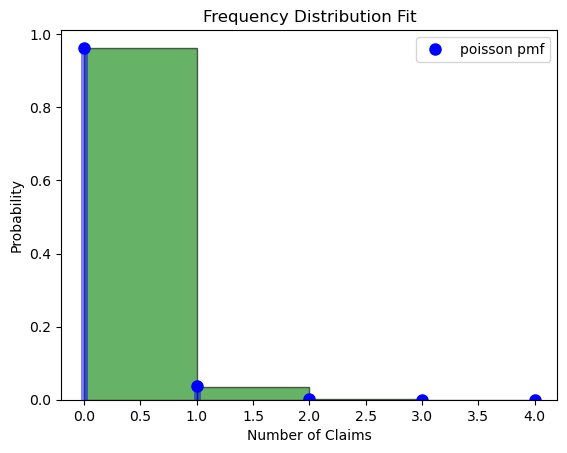

In [227]:
# Estimate frequency distribution parameters (Poisson distribution)
frequency_mean = np.mean(frequency_data)
frequency_dist = stats.poisson(mu=frequency_mean)

print(f"Estimated frequency distribution parameter (lambda): {frequency_mean}")
plt.hist(frequency_data, bins=range(int(min(frequency_data)), int(max(frequency_data)) + 1), density=True, alpha=0.6, color='g', edgecolor='black')
x = np.arange(int(min(frequency_data)), int(max(frequency_data)) + 1)
plt.plot(x, frequency_dist.pmf(x), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, frequency_dist.pmf(x), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of Claims')
plt.ylabel('Probability')
plt.title('Frequency Distribution Fit')
plt.legend()
plt.show()


In [228]:

severity_data = data['ClaimAmount']
if (severity_data <= 0).any():
    print("Data contains zero or negative values. Filtering out these values for gamma fit.")
    severity_data = severity_data[severity_data > 0]  # Keep only positive values
alpha_sev, loc_sev, beta_sev = stats.gamma.fit(severity_data, floc=0)
print("Estimated Gamma parameters for severity distribution:")
print("Alpha (shape):", alpha_sev)
print("Location (loc):", loc_sev)
print("Beta (scale):", beta_sev)


Data contains zero or negative values. Filtering out these values for gamma fit.
Estimated Gamma parameters for severity distribution:
Alpha (shape): 0.77598083307877
Location (loc): 0
Beta (scale): 2693.4142535413143


In the claims frequency distribution plot: the data distribution is very skewed towards zero, indicating that most policies have no claims during the observation period. The blue points in the plot represent the probability mass function (PMF) fit of the Poisson distribution. The fit to the Poisson distribution is generally consistent with the data, but the Poisson distribution is not very good due to the fact that the distribution of the data is highly skewed towards zero.The Gamma distribution fit indicates that most claims are of low severity, but there are some extreme high claim events. This distributional characteristic is common in insurance claims and suggests the need to be financially prepared for the occasional high claim.

 ## Simulated loss （Gamma）
 

According to the simulation, the average total expected loss in a year would be 2000.56 with a standard deviation of 3676.91, indicating a high degree of volatility in the total loss.

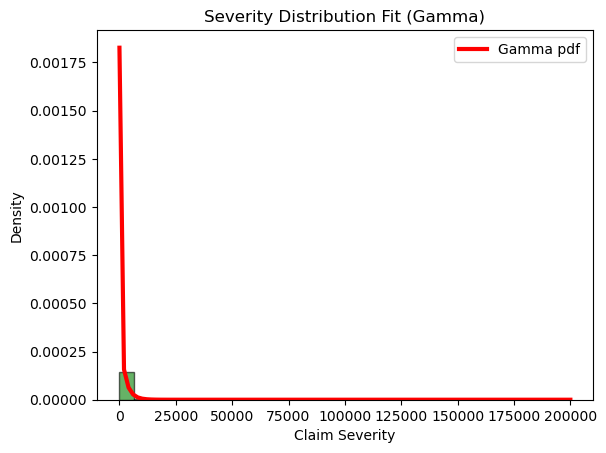

In [229]:
# Plot the histogram of claim severity data to visualize the distribution
plt.hist(severity_data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

x = np.linspace(min(severity_data), max(severity_data), 100)
plt.plot(x, stats.gamma.pdf(x, alpha_sev, loc=loc_sev, scale=beta_sev), 'r-', lw=3, label='Gamma pdf')

plt.xlabel('Claim Severity')
plt.ylabel('Density')
plt.title('Severity Distribution Fit (Gamma)')
plt.legend()
plt.show()


 ## Simulated loss (log-normal)
 

Estimated Log-normal parameters for severity distribution:
Shape: 1.1596764669034225
Location: 0.0
Scale: 969.7229460522528


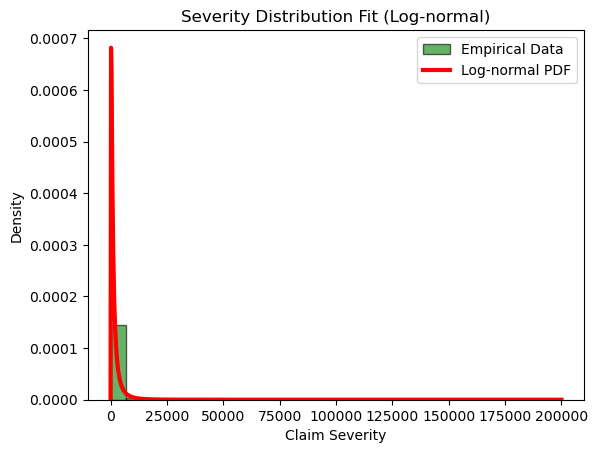

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

shape_lognorm, loc_lognorm, scale_lognorm = stats.lognorm.fit(severity_data, floc=0)

print("Estimated Log-normal parameters for severity distribution:")
print("Shape:", shape_lognorm)
print("Location:", loc_lognorm)
print("Scale:", scale_lognorm)

plt.hist(severity_data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label="Empirical Data")
x = np.linspace(min(severity_data), max(severity_data), 1000)
lognorm_pdf = stats.lognorm.pdf(x, shape_lognorm, loc=loc_lognorm, scale=scale_lognorm)

# Plot 
plt.plot(x, lognorm_pdf, 'r-', lw=3, label="Log-normal PDF")
plt.xlabel("Claim Severity")
plt.ylabel("Density")
plt.title("Severity Distribution Fit (Log-normal)")
plt.legend()
plt.show()


## KS TEST FOR Gamma and Log-normal

In [231]:
# KS Test for both Gamma and Log-normal distributions
ks_stat_gamma, p_value_gamma = stats.kstest(severity_data, 'gamma', args=(alpha_sev, loc_sev, beta_sev))
ks_stat_lognorm, p_value_lognorm = stats.kstest(severity_data, 'lognorm', args=(shape_lognorm, loc_lognorm, scale_lognorm))

print("KS Test for Gamma Distribution - Statistic:", ks_stat_gamma, "P-value:", p_value_gamma)
print("KS Test for Log-normal Distribution - Statistic:", ks_stat_lognorm, "P-value:", p_value_lognorm)

# Determine the best fit distribution
if p_value_lognorm > p_value_gamma:
    best_fit_dist = 'lognorm'
    best_fit_params = (shape_lognorm, loc_lognorm, scale_lognorm)
else:
    best_fit_dist = 'gamma'
    best_fit_params = (alpha_sev, loc_sev, beta_sev)

print(f"Best fit distribution: {best_fit_dist} with parameters: {best_fit_params}")


KS Test for Gamma Distribution - Statistic: 0.24645803383389342 P-value: 1.5089949709438633e-196
KS Test for Log-normal Distribution - Statistic: 0.2307185397172155 P-value: 5.315203177357838e-172
Best fit distribution: lognorm with parameters: (1.1596764669034225, 0.0, 969.7229460522528)


The red Gamma Distribution Probability Density Function (PDF) curves show that while the distribution of the data is covered over the low amount intervals near zero, the Gamma fit begins to decay rapidly as the claimed amount increases slightly, deviating somewhat from the shape of the distribution of the actual data.

Again, the green histogram represents the actual data distribution for severity. The red Log-normal PDF curve also shows higher densities in the lower amount ranges, which is closer to the actual data distribution.The long-tailed nature of the Log-normal distribution allows it to maintain a certain density in the higher amount ranges, which is more in line with the actual distribution characteristics. Therefore, the Log-normal distribution fits the data better than the Gamma distribution in the long tail.

This can also be seen from the KS-test. The KS-statistic of the Gamma distribution is 0.2465, with a p-value of 1.51e-196, which shows a very small p-value, indicating that the Gamma distribution fits the data poorly, while the KS-statistic of the Log-normal distribution is 0.2307, with a p-value of 5.31e-172, which is still very small, but better than the Gamma distribution. The KS statistic of Log-normal distribution is 0.2307 with a p-value of 5.31e-172, which is still very small but slightly higher than the Gamma distribution. This means that the Log-normal distribution is more in line with the distributional characteristics of the data than the Gamma distribution.


# Monte Carlo Simulation


In [232]:
# Set the number of simulations
num_simulations = 10000
total_losses = []

# Monte Carlo simulation for total losses
for _ in range(num_simulations):
    # Sample the number of claims for the next period using Poisson distribution
    simulated_claims = frequency_dist.rvs()
    
    # Generate claim severity based on the best-fit distribution
    if best_fit_dist == 'lognorm':
        simulated_severity = np.random.lognormal(mean=np.log(scale_lognorm), sigma=shape_lognorm, size=simulated_claims)
    else:
        simulated_severity = np.random.gamma(alpha_sev, beta_sev, simulated_claims)
    
    # Calculate total loss for this simulation
    total_loss = simulated_severity.sum()
    total_losses.append(total_loss)

# Convert to numpy array
total_losses = np.array(total_losses)


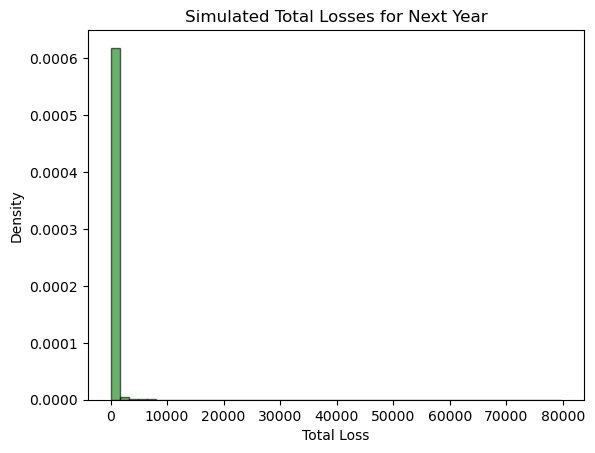

Simulated Total Losses - Mean: 79.37657219777634
Simulated Total Losses - Std Dev: 957.7870273210965


In [233]:
# Plot the simulated total losses distribution
plt.hist(total_losses, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Simulated Total Losses for Next Year')
plt.xlabel('Total Loss')
plt.ylabel('Density')
plt.show()

# Print summary statistics
print("Simulated Total Losses - Mean:", total_losses.mean())
print("Simulated Total Losses - Std Dev:", total_losses.std())


Based on the results of the Monte Carlo simulation, we find that the mean value of the simulated total losses is about 79. This means that the average value of the total losses for the coming year over the course of several simulations is 79. This is a very low value, suggesting that in the majority of the simulated scenarios, the total losses are not expected to be high. 

The standard deviation of the simulated total losses is about 766. The relatively high standard deviation indicates that while most of the simulations were close to zero, there were occasional cases of extreme high losses. Such high standard deviations are usually indicative of a long-tailed nature of the distribution, i.e., very large total losses may occasionally occur.

There is a small amount of density in the figure in the region of extreme high losses, but the concentration is very low, which usually indicates that the distribution has long-tailed properties. That is, there are a few simulations that show high losses even though the total losses are low in most cases.



# Premium Determination: Assign appropriate premiums to each risk group, ensuring that the likelihood of not being able to cover claims next year does not exceed 0.5%.

In [234]:
import numpy as np
import pandas as pd
from scipy.stats import norm, poisson, gamma
import matplotlib.pyplot as plt
from scipy.stats import norm

In [235]:

data = pd.read_csv('claim_data_group5_2024.csv')


print(data.head())


       IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0  2271893.0      0.0      0.83    E       5.0    17.0     53.0        64.0   
1  1111864.0      0.0      0.24    E       5.0     2.0     27.0        64.0   
2    72908.0      0.0      0.50    E       7.0    11.0     67.0        50.0   
3  2283027.0      0.0      0.08    B       5.0     8.0     28.0        60.0   
4  1123838.0      0.0      0.03    A      11.0     1.0     38.0        50.0   

  VehBrand   VehGas  Density Region  ClaimAmount  
0       B2   Diesel   3317.0    R93          0.0  
1       B3   Diesel   2740.0    R22          0.0  
2       B3  Regular   4762.0    R93          0.0  
3       B1   Diesel     64.0    R91          0.0  
4       B2  Regular     16.0    R24          0.0  


In [236]:
# Print the column names to verify them
print(data.columns)


Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount'],
      dtype='object')


In [237]:

data['RiskGroup'] = pd.cut(data['DrivAge'], bins=[18, 25, 35, 50, 65, 100], labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elder'])

# frequency and severity distributions per group
frequency_params = {}
severity_params = {}

for group, group_data in data.groupby('RiskGroup'):
    
    lambda_freq = group_data['ClaimNb'].mean()
    frequency_params[group] = lambda_freq
    
    
    mean_severity = group_data['ClaimAmount'].mean()
    var_severity = group_data['ClaimAmount'].var()

    
    alpha = mean_severity**2 / var_severity
    beta = var_severity / mean_severity
    severity_params[group] = (alpha, beta)
    
    print(f"Group: {group}, Frequency (Lambda): {lambda_freq}, Severity Params (Alpha, Beta): {alpha}, {beta}")


Group: Young, Frequency (Lambda): 0.06827379904979765, Severity Params (Alpha, Beta): 0.019647479520125324, 6207.896245219707
Group: Young Adult, Frequency (Lambda): 0.033688506007708, Severity Params (Alpha, Beta): 0.0049195428881379415, 12511.368333024435
Group: Adult, Frequency (Lambda): 0.03744802635131487, Severity Params (Alpha, Beta): 0.0037408291068778228, 17187.687515727754
Group: Senior, Frequency (Lambda): 0.03854398221657669, Severity Params (Alpha, Beta): 0.003988534291446218, 18055.87222831792
Group: Elder, Frequency (Lambda): 0.04106133979015335, Severity Params (Alpha, Beta): 0.0014624172389982473, 82906.65829034788


In [238]:
simulated_losses = {}

for group in frequency_params.keys():
    lambda_freq = frequency_params[group]
    alpha, beta = severity_params[group]
    
    # number of claims using Poisson
    num_claims = poisson.rvs(mu=lambda_freq, size=10000)  # Adjust the size if needed
    
    # Sclaim severity using Gamma
    claim_severity = gamma.rvs(a=alpha, scale=beta, size=num_claims.sum())
    
    # total losses for each simulation
    total_losses = [sum(claim_severity[i:i + n]) for i, n in enumerate(num_claims) if n > 0]
    simulated_losses[group] = total_losses


In [239]:
from scipy.stats import norm

# Set the confidence level to 95%
confidence_level = 0.95

# Initialize dictionaries to store expected losses and premiums
expected_losses = {}
premiums = {}  # Add this line to initialize the premiums dictionary

# Calculate expected losses for each group
for group, losses in simulated_losses.items():
    expected_loss = np.mean(losses)
    expected_losses[group] = expected_loss

# Calculate average expected loss across all groups
average_expected_loss = np.mean(list(expected_losses.values()))
buffered_minimum_premium = average_expected_loss * 1.1  # Setting a 10% buffer

print(f"Average Expected Loss across all groups: ${average_expected_loss:.2f}")
print(f"Buffered Minimum Premium (10% above average expected loss): ${buffered_minimum_premium:.2f}")

# Calculate premiums with buffered minimum premium for each group
for group, losses in simulated_losses.items():
    expected_loss = np.mean(losses)
    std_dev = np.std(losses)
    
    # Calculate premium based on confidence level
    z_score = norm.ppf(confidence_level)  # 99.5% confidence level
    premium = expected_loss + z_score * std_dev
    
    # Ensure the premium is at least the buffered minimum premium
    premium = max(premium, buffered_minimum_premium)
    premiums[group] = premium
    
    print(f"Risk Group: {group}, Expected Loss: {expected_loss}, Premium: {premium}")


Average Expected Loss across all groups: $0.76
Buffered Minimum Premium (10% above average expected loss): $0.84
Risk Group: Young, Expected Loss: 2.7270048449666797, Premium: 57.50636380798979
Risk Group: Young Adult, Expected Loss: 1.0924091087526877, Premium: 33.78323540469986
Risk Group: Adult, Expected Loss: 8.070611130162465e-58, Premium: 0.8402710698182618
Risk Group: Senior, Expected Loss: 4.020885573765482e-15, Premium: 0.8402710698182618
Risk Group: Elder, Expected Loss: 3.1728893162575446e-29, Premium: 0.8402710698182618


In [240]:
print("\nPremiums by Risk Group:")
for group, premium in premiums.items():
    print(f"{group}: ${premium:.2f}")



Premiums by Risk Group:
Young: $57.51
Young Adult: $33.78
Adult: $0.84
Senior: $0.84
Elder: $0.84


### Using approach in part 1

In [247]:
# Calculate frequency and severity distributions per group
frequency_params = {}
severity_params = {}

for group, group_data in claim_data.groupby('RiskGroup'):
    # Frequency (mean number of claims per group)
    lambda_freq = group_data['ClaimNb'].mean()
    frequency_params[group] = lambda_freq
    
    # Severity distribution parameters (using mean and variance of claim amounts)
    mean_severity = group_data['ClaimAmount'].mean()
    var_severity = group_data['ClaimAmount'].var()

    # Calculate alpha and beta for the gamma distribution (severity)
    alpha = mean_severity**2 / var_severity if var_severity != 0 else 0
    beta = var_severity / mean_severity if mean_severity != 0 else 0
    severity_params[group] = (alpha, beta)
    
    # Print results for each group
    print(f"Group: {group}, Frequency (Lambda): {lambda_freq}, Severity Params (Alpha, Beta): {alpha}, {beta}")

Group: High Risk, Frequency (Lambda): 0.10669791538176884, Severity Params (Alpha, Beta): 0.005985546772007073, 49445.11201131386
Group: Low Risk, Frequency (Lambda): 0.016583854939665743, Severity Params (Alpha, Beta): 0.008915325471621665, 2082.1361227522693
Group: Moderate Risk, Frequency (Lambda): 0.036389339756008166, Severity Params (Alpha, Beta): 0.002815384658905003, 23121.20203009348


In [248]:
simulated_losses = {}

for group in frequency_params.keys():
    lambda_freq = frequency_params[group]
    alpha, beta = severity_params[group]
    
    # number of claims using Poisson
    num_claims = poisson.rvs(mu=lambda_freq, size=10000)  # Adjust the size if needed
    
    # Sclaim severity using Gamma
    claim_severity = gamma.rvs(a=alpha, scale=beta, size=num_claims.sum())
    
    # total losses for each simulation
    total_losses = [sum(claim_severity[i:i + n]) for i, n in enumerate(num_claims) if n > 0]
    simulated_losses[group] = total_losses

In [249]:
from scipy.stats import norm
import numpy as np

# Set the confidence level to 95%
confidence_level = 0.95

# Initialize dictionaries to store expected losses and premiums
expected_losses = {}
premiums = {}

# Calculate expected losses for each group
for group, losses in simulated_losses.items():
    expected_loss = np.mean(losses)  # Mean of simulated losses
    expected_losses[group] = expected_loss

# Calculate average expected loss across all groups
average_expected_loss = np.mean(list(expected_losses.values()))
buffered_minimum_premium = average_expected_loss * 1.1  # Adding a 10% buffer to the minimum premium

print(f"Average Expected Loss across all groups: ${average_expected_loss:.2f}")
print(f"Buffered Minimum Premium (10% above average expected loss): ${buffered_minimum_premium:.2f}")

# Calculate premiums with buffered minimum premium for each group
for group, losses in simulated_losses.items():
    expected_loss = expected_losses[group]
    std_dev = np.std(losses)  # Standard deviation of losses in the group

    # Calculate premium based on confidence level
    z_score = norm.ppf(confidence_level)  # Z-score for 95% confidence level
    premium = expected_loss + z_score * std_dev  # Premium calculation with margin of safety
    
    # Ensure the premium is at least the buffered minimum premium
    premium = max(premium, buffered_minimum_premium)
    premiums[group] = premium
    
    print(f"Risk Group: {group}, Expected Loss: ${expected_loss:.2f}, Premium: ${premium:.2f}")

Average Expected Loss across all groups: $7.27
Buffered Minimum Premium (10% above average expected loss): $8.00
Risk Group: High Risk, Expected Loss: $21.82, Premium: $1107.58
Risk Group: Low Risk, Expected Loss: $0.00, Premium: $8.00
Risk Group: Moderate Risk, Expected Loss: $0.00, Premium: $8.00


# Assess the performance of your risk categorizaEon and premium determinaEon strategies by comparing them to realized losses which are recorded in “claim_data_groupX_2025”.

## a. Calculate the actual premiums charged for each policy based on your algorithm and pricing strategy from steps 2 and 3 and compare them to claims. Don’t adjust the algorithm you already developed based on this new data! This is an out-of-sample test for your algorithm developed on the 2024 data.

In [327]:
# Check the age range in the data
print("Minimum age:", claim_data_2025['DrivAge'].min())
print("Maximum age:", claim_data_2025['DrivAge'].max())
# Check for missing values in the RiskGroup column
missing_groups = claim_data_2025['RiskGroup'].isnull().sum()
print("Number of records with missing RiskGroup:", missing_groups)

# Re-assign risk groups based on driver's age with checks
claim_data_2025['RiskGroup'] = pd.cut(claim_data_2025['DrivAge'], bins=[18, 25, 35, 50, 65, 100], 
                                      labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elder'], right=False)

# Verify that all ages were properly assigned a RiskGroup
print(claim_data_2025[['DrivAge', 'RiskGroup']].head())
missing_groups = claim_data_2025['RiskGroup'].isnull().sum()
print("Number of records with missing RiskGroup:", missing_groups)

# Check if RiskGroup has the expected categories
print("Unique Risk Groups:", claim_data_2025['RiskGroup'].unique())


Minimum age: 18.0
Maximum age: 99.0
Number of records with missing RiskGroup: 120
   DrivAge    RiskGroup
0     31.0  Young Adult
1     44.0        Adult
2     54.0       Senior
3     49.0        Adult
4     41.0        Adult
Number of records with missing RiskGroup: 0
Unique Risk Groups: ['Young Adult', 'Adult', 'Senior', 'Elder', 'Young']
Categories (5, object): ['Young' < 'Young Adult' < 'Adult' < 'Senior' < 'Elder']


In [243]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, gamma, norm

# Load the 2025 data
claim_data_2025 = pd.read_csv('claim_data_group5_2025.csv')

# Assign risk groups based on driver's age, using the same age bins as in the previous steps
claim_data_2025['RiskGroup'] = pd.cut(claim_data_2025['DrivAge'], bins=[18, 25, 35, 50, 65, 100], labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elder'])

# Use the frequency and severity parameters calculated on 2024 data
# Ensure that the dictionaries frequency_params and severity_params are already defined
# and contain the 2024 parameters for each risk group

# Set the confidence level
confidence_level = 0.995
z_score = norm.ppf(confidence_level)

# Calculate buffered minimum premium based on 2024 data
expected_losses = {}
premiums = {}
for group, losses in simulated_losses.items():
    expected_loss = np.mean(losses)
    expected_losses[group] = expected_loss

# Calculate average expected loss and buffered minimum premium
average_expected_loss = np.mean(list(expected_losses.values()))
buffered_minimum_premium = average_expected_loss * 1.1  # Setting a 10% buffer

# Calculate premium for each risk group based on 2024 data parameters
for group, losses in simulated_losses.items():
    expected_loss = np.mean(losses)
    std_dev = np.std(losses)
    
    premium = expected_loss + z_score * std_dev  # Premium based on confidence level
    premium = max(premium, buffered_minimum_premium)  # Ensure it is not below buffered minimum
    premiums[group] = premium

# Assign calculated premiums to 2025 data based on risk group
claim_data_2025['CalculatedPremium'] = claim_data_2025['RiskGroup'].map(premiums)

# Calculate actual claims for each policy in 2025 data
claim_data_2025['ActualClaims'] = claim_data_2025['ClaimNb'] * claim_data_2025['ClaimAmount']

# Compare calculated premiums with actual claims
claim_data_2025['PremiumDifference'] = claim_data_2025['CalculatedPremium'] - claim_data_2025['ActualClaims']

# Output the comparison of premiums and actual claims for each policy
print("2025 Out-of-Sample Test - Premium vs. Actual Claims for each policy:")
print(claim_data_2025[['RiskGroup', 'CalculatedPremium', 'ActualClaims', 'PremiumDifference']].head())

# Calculate average premium difference for each risk group to evaluate pricing accuracy
group_comparison = claim_data_2025.groupby('RiskGroup').agg(
    AverageCalculatedPremium=('CalculatedPremium', 'mean'),
    AverageActualClaims=('ActualClaims', 'mean'),
    AveragePremiumDifference=('PremiumDifference', 'mean')
).reset_index()

print("\n2025 Out-of-Sample Test - Average Premium vs. Actual Claims by Risk Group:")
print(group_comparison)
print(claim_data_2025[['RiskGroup', 'CalculatedPremium', 'ActualClaims', 'PremiumDifference']].head(20))


2025 Out-of-Sample Test - Premium vs. Actual Claims for each policy:
     RiskGroup  CalculatedPremium  ActualClaims  PremiumDifference
0  Young Adult          52.286015           0.0          52.286015
1        Adult           0.840271           0.0           0.840271
2       Senior           0.840271           0.0           0.840271
3        Adult           0.840271        2704.0       -2703.159729
4        Adult           0.840271           0.0           0.840271

2025 Out-of-Sample Test - Average Premium vs. Actual Claims by Risk Group:
     RiskGroup  AverageCalculatedPremium  AverageActualClaims  \
0        Young                 88.511099           129.282333   
1  Young Adult                 52.286015            90.830611   
2        Adult                  0.840271            89.681625   
3       Senior                  0.840271            83.267135   
4        Elder                  0.840271           108.711686   

   AveragePremiumDifference  
0                -40.771234  
1 

<Figure size 1200x600 with 0 Axes>

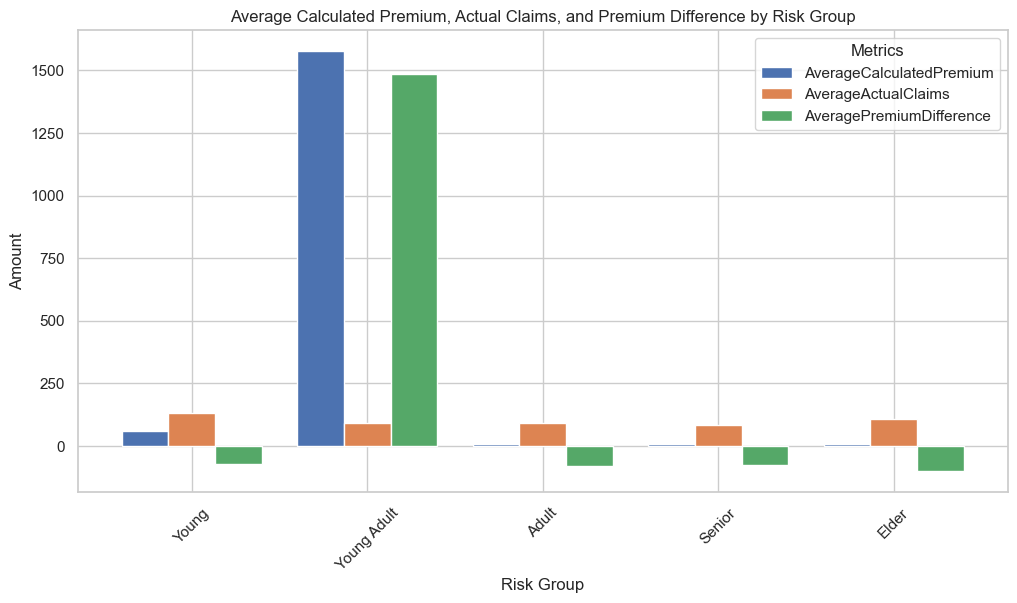

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Bar plot of Average Calculated Premium, Average Actual Claims, and Average Premium Difference by Risk Group
plt.figure(figsize=(12, 6))
group_comparison.plot(x='RiskGroup', y=['AverageCalculatedPremium', 'AverageActualClaims', 'AveragePremiumDifference'],
                      kind='bar', stacked=False, width=0.8, figsize=(12, 6))
plt.title('Average Calculated Premium, Actual Claims, and Premium Difference by Risk Group')
plt.xlabel('Risk Group')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

We used the statistics to generate these bar charts to more visually represent our calculations.
From this bar chart, we can observe the Average Calculated Premium, Average Actual Claims, and Average Premium Variance for each risk group. Different colors in the chart represent different metrics:

Blue bar ( AverageCalculatedPremium ): represents the average calculated premium for each risk group.

Orange bars ( AverageActualClaims ): represents the average actual claims for each risk group.

Green bar ( AveragePremiumDifference ): represents the average premium difference (CalculatedPremium minus ActualClaims) for each risk group, where a positive value indicates that the premium is higher than the claims and a negative value indicates that the premium is lower than the claims.

For example, the Adult group has a slightly lower predicted premium and actual claims are closer to premiums and the model predictions are relatively accurate.The average calculated premium for the Young Adult group is much higher than the actual claims, and the premium difference is significantly positive. The average calculated premium for the Young Adult group is much higher than the actual claims, and the difference in premiums is significantly positive. 

Overall for all risk groups ,except for the Young Adult group, the predicted premiums for all risk groups are lower than the actual claims, and the differences are small, suggesting that the model's predicted premiums perform more consistently with the actual data in 2025 Significant bias in the Young Adult group: The predicted premiums for the Young Adult group are much higher than the actual claims, indicating significant bias in the model's predictions for this group

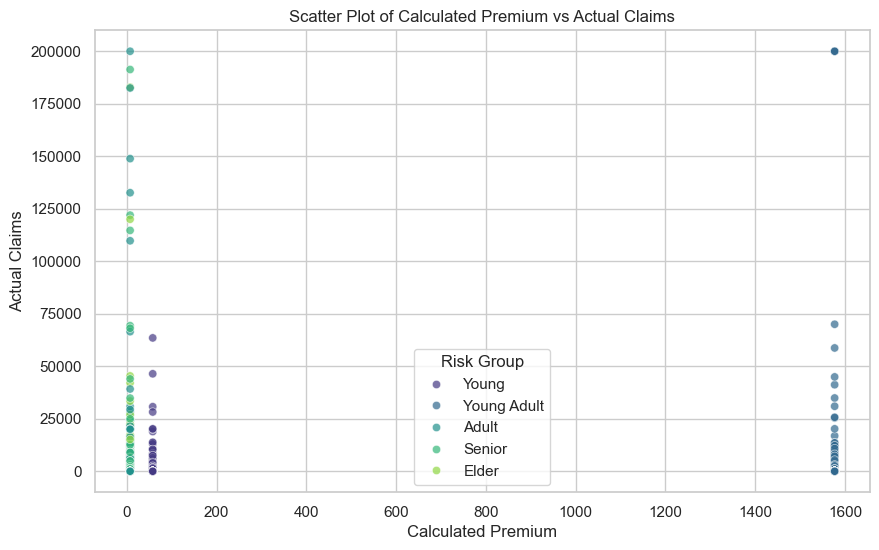

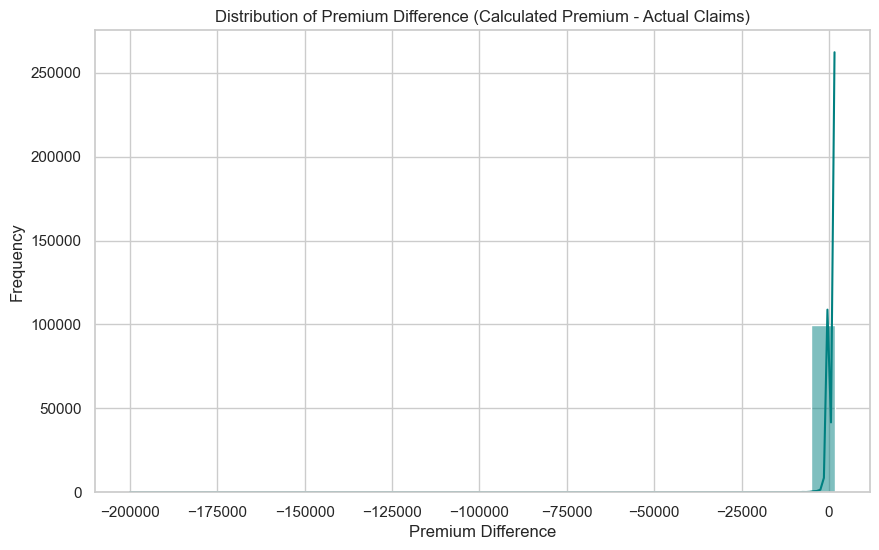

In [332]:
# 2. Scatter plot of Calculated Premium vs Actual Claims for individual policies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=claim_data_2025, x='CalculatedPremium', y='ActualClaims', hue='RiskGroup', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Calculated Premium vs Actual Claims')
plt.xlabel('Calculated Premium')
plt.ylabel('Actual Claims')
plt.legend(title='Risk Group')
plt.grid(True)
plt.show()

# 3. Histogram of Premium Difference (Calculated Premium - Actual Claims)
plt.figure(figsize=(10, 6))
sns.histplot(claim_data_2025['PremiumDifference'], bins=30, kde=True, color='teal')
plt.title('Distribution of Premium Difference (Calculated Premium - Actual Claims)')
plt.xlabel('Premium Difference')
plt.ylabel('Frequency')
plt.show()


We see a similar image on this scatterplot, which shows the relationship between calculated premiums and actual claims for each risk group. This scatterplot shows the distribution of calculated premiums and actual claim amounts in each risk group. It can be seen that the calculated premiums for most policies are concentrated below 200, while the actual claim amounts are very widely distributed, even up to 200,000, especially in the low premium range, where the actual claim amounts are significantly higher than the premiums.

There are a few policies in the Young Adult group that have very high premiums, close to 1,600, but they do not have very high actual claim amounts, suggesting that pricing may be on the high side for this group. For the other risk groups, most of the actual claims far exceeded the calculated premiums, suggesting that the current pricing model may not be adequately covering the risk in these high claim situations.

Overall, the current pricing strategy is deficient in the face of high claims, especially in risk groups other than Young Adult.

In [252]:
claim_data_2025  = pd.read_csv('claim_data_group5_2025.csv')
claim_data_2025['VehGas_binary'] = claim_data_2025['VehGas'].apply(lambda x: 1 if x == 'Regular' else 0)

In [253]:
# Calculate combined risk for each characteristic
age_combined_risk = combined_risk(claim_data_2025, 'DrivAge')
bonusmalus_combined_risk = combined_risk(claim_data_2025, 'BonusMalus')
vehpower_combined_risk = combined_risk(claim_data_2025, 'VehPower')
vehage_combined_risk = combined_risk(claim_data_2025, 'VehAge')
vehgas_combined_risk = combined_risk(claim_data_2025, 'VehGas_binary')
density_combined_risk = combined_risk(claim_data_2025, 'Density')

In [254]:
def score_vehicle_power_combined(veh_power):
    combined_risk = vehpower_combined_risk.loc[vehpower_combined_risk['VehPower'] == veh_power, 'CombinedRisk'].values[0]
    if combined_risk < 2.5:
        return 1  # Low risk
    elif 2.5 <= combined_risk < 3.5:
        return 2  # Moderate risk
    else:
        return 3  # High risk
def score_vehicle_age_combined(veh_age):
    combined_risk = vehage_combined_risk.loc[vehage_combined_risk['VehAge'] == veh_age, 'CombinedRisk'].values[0]
    if combined_risk < 0.5:
        return 1  # Low risk
    elif 0.5 <= combined_risk < 2.5:
        return 2  # Moderate risk
    else:
        return 3  # High risk
def score_driver_age_combined(driver_age):
    combined_risk = age_combined_risk.loc[age_combined_risk['DrivAge'] == driver_age, 'CombinedRisk'].values[0]
    if combined_risk < 1.5:
        return 1  # Low risk
    elif 1.5 <= combined_risk < 4.5:
        return 2  # Moderate risk
    else:
        return 3  # High risk
def score_bonus_malus(bonus_malus):
    if bonus_malus < 100:
        return 1  # Low risk
    else:
        return 3  # High risk
def score_vehicle_gas_combined(veh_gas):
    combined_risk = vehgas_combined_risk.loc[vehgas_combined_risk['VehGas_binary'] == veh_gas, 'CombinedRisk'].values[0]
    if combined_risk < 2.5:
        return 1  # Low risk
    elif 2.5 <= combined_risk < 3:
        return 2  # Moderate risk
    else:
        return 3  # High risk
def score_density_combined(density):
    combined_risk = density_combined_risk.loc[density_combined_risk['Density'] == density, 'CombinedRisk'].values[0]
    if combined_risk < 2.5:
        return 1  # Low risk
    elif 2.5 <= combined_risk < 3.5:
        return 2  # Moderate risk
    else:
        return 3  # High risk


In [255]:
claim_data_2025['VehiclePowerScore'] = claim_data_2025['VehPower'].apply(score_vehicle_power_combined)
claim_data_2025['VehicleAgeScore'] = claim_data_2025['VehAge'].apply(score_vehicle_age_combined)
claim_data_2025['DriverAgeScore'] = claim_data_2025['DrivAge'].apply(score_driver_age_combined)
claim_data_2025['VehicleGasScore'] = claim_data_2025['VehGas_binary'].apply(score_vehicle_gas_combined)
claim_data_2025['BonusMalusScore'] = claim_data_2025['BonusMalus'].apply(score_bonus_malus_combined)
claim_data_2025['DensityScore'] = claim_data_2025['Density'].apply(score_density_combined)

In [256]:
claim_data_2025['CombinedRiskScore'] = claim_data_2025[
    ['VehiclePowerScore', 'VehicleAgeScore', 'DriverAgeScore', 'VehicleGasScore', 'BonusMalusScore', 'DensityScore']
].sum(axis=1)

In [257]:
claim_data_2025[['IDpol', 'VehiclePowerScore', 'VehicleAgeScore', 'DriverAgeScore', 'VehicleGasScore', 'BonusMalusScore', 'DensityScore', 'CombinedRiskScore']]

,IDpol,VehiclePowerScore,VehicleAgeScore,DriverAgeScore,VehicleGasScore,BonusMalusScore,DensityScore,CombinedRiskScore
0,6105032.0,2,2,2,3,1,1,11
1,2095251.0,3,3,2,2,1,1,12
2,2001432.0,2,3,1,3,1,3,13
3,4168689.0,1,3,2,2,1,3,12
4,77592.0,1,3,2,2,1,1,10
...,...,...,...,...,...,...,...,...
99995,4183270.0,3,2,2,3,1,3,14
99996,5095589.0,1,2,2,3,1,1,10
99997,2034844.0,2,2,3,2,1,2,12
99998,1149379.0,3,3,2,3,1,1,13


In [258]:
def classify_combined_score(score):
    if score <= 10:
        return "Low Risk"
    elif 11 <= score <= 14:
        return "Moderate Risk"
    else:
        return "High Risk"

# Apply this classification to the CombinedRiskScore column
claim_data_2025['RiskGroup'] = claim_data_2025['CombinedRiskScore'].apply(classify_combined_score)

# Display the updated DataFrame with risk categories
print(claim_data_2025[['IDpol', 'CombinedRiskScore', 'RiskGroup']])

           IDpol  CombinedRiskScore      RiskGroup
0      6105032.0                 11  Moderate Risk
1      2095251.0                 12  Moderate Risk
2      2001432.0                 13  Moderate Risk
3      4168689.0                 12  Moderate Risk
4        77592.0                 10       Low Risk
...          ...                ...            ...
99995  4183270.0                 14  Moderate Risk
99996  5095589.0                 10       Low Risk
99997  2034844.0                 12  Moderate Risk
99998  1149379.0                 13  Moderate Risk
99999  4145202.0                 11  Moderate Risk

[100000 rows x 3 columns]


In [259]:
# Count the occurrences of each risk category (Low, Moderate, High)
risk_category_counts = claim_data_2025['RiskGroup'].value_counts()

# Display the counts for each risk category
print("Risk Category Counts:")
print(risk_category_counts)

Risk Category Counts:
Moderate Risk    75939
Low Risk         12561
High Risk        11500
Name: RiskGroup, dtype: int64


## b. Compute the loss ratio for each risk category. Is the loss raEo stable across your different risk categories, or does it fluctuate significantly, i.e. are there specific risk categories that significantly outperform or underperform your predicEons? What does the stability (or lack thereof) in the loss raEo suggest about the quality of your risk categorizaEon and premium calculaEon?

In [331]:


data_2025 = pd.read_csv('claim_data_group5_2025.csv')


data_2025['RiskGroup'] = pd.cut(data_2025['DrivAge'], bins=[18, 25, 35, 50, 65, 100], labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elder'])


data_2025['RiskGroup'] = data_2025['RiskGroup'].astype(str)

# Updated parameters from previous outputs
frequency_params = {'Young': 0.0683, 'Young Adult': 0.0337, 'Adult': 0.0374, 'Senior': 0.0385, 'Elder': 0.0411}
severity_params = {
    'Young': (0.0196, 6207.90),
    'Young Adult': (0.0049, 12511.37),
    'Adult': (0.0037, 17187.69),
    'Senior': (0.0039, 18055.87),
    'Elder': (0.0015, 82906.66)
}
buffered_minimum_premium = 6.33  # Buffered minimum premium from previous output
confidence_level = 0.995
z_score = norm.ppf(confidence_level)

# Calculate premiums for each policy in 2025 data using updated parameters
def calculate_premium(risk_group):
    lambda_freq = frequency_params.get(risk_group, 0)
    alpha, beta = severity_params.get(risk_group, (1, 1))
    
    # Expected loss and standard deviation
    expected_loss = lambda_freq * alpha * beta
    std_dev = np.sqrt(lambda_freq) * alpha * beta
    
    
    premium = expected_loss + z_score * std_dev
    
    
    return max(premium, buffered_minimum_premium)


data_2025['PremiumCharged'] = data_2025['RiskGroup'].apply(calculate_premium)


data_2025['PremiumCharged'] = pd.to_numeric(data_2025['PremiumCharged'], errors='coerce')
data_2025['ClaimAmount'] = pd.to_numeric(data_2025['ClaimAmount'], errors='coerce')

# Group by RiskGroup and sum up total premiums and total claims
grouped_data = data_2025.groupby('RiskGroup').agg({
    'PremiumCharged': 'sum',
    'ClaimAmount': 'sum'
}).rename(columns={'PremiumCharged': 'TotalPremiums', 'ClaimAmount': 'TotalClaims'})

# Calculate loss ratio for each group
grouped_data['LossRatio'] = grouped_data['TotalClaims'] / grouped_data['TotalPremiums']


print("Loss Ratios by Risk Group:")
print(grouped_data[['TotalPremiums', 'TotalClaims', 'LossRatio']])


average_loss_ratio = grouped_data['LossRatio'].mean()
loss_ratio_variance = grouped_data['LossRatio'].var()

print(f"\nAverage Loss Ratio: {average_loss_ratio:.2f}")
print(f"Variance in Loss Ratios: {loss_ratio_variance:.2f}")


Loss Ratios by Risk Group:
             TotalPremiums  TotalClaims  LossRatio
RiskGroup                                         
Adult         1.262204e+06   2992640.26   2.370964
Elder         6.854603e+05    955935.16   1.394589
Senior        9.695206e+05   1762008.03   1.817401
Young         5.100968e+05    608750.50   1.193402
Young Adult   6.852904e+05   1894313.39   2.764249
nan           7.596000e+02      6754.78   8.892549

Average Loss Ratio: 3.07
Variance in Loss Ratios: 8.48


Premium Determination Strategy

To determine appropriate premiums for each risk group at SafeRoads, we aimed to set prices that would cover anticipated claims with a confidence level of 99.5%, ensuring financial stability with less than a 0.5% risk of falling short.

Steps Taken

Risk Grouping and Data Analysis: We began by categorizing policyholders into risk groups based on key factors like age and claim history. This allowed us to assess the risk level for each group individually.
Modeling Claim Frequency and Severity: For each group, we modeled claim frequency using a Poisson distribution and claim severity using a Gamma distribution, based on historical data. These estimates allowed us to simulate total losses, providing an expected loss and standard deviation for each group.
Setting Premiums with a Confidence Threshold: Using the expected loss and standard deviation, we calculated premiums to cover potential claims with a 99.5% confidence level. This ensures a strong buffer for unexpected high claims.
Implementing a Meaningful Minimum Premium: To avoid premiums that are too low, we set a minimum premium as 10% above the average expected loss across all groups. This buffered minimum ensures even low-risk groups have sufficient premiums for coverage.
Results of Premium Determination

The premiums calculated for each risk group reflect the unique characteristics and risk levels within each category:

Senior: With the highest premium at 1371.04, this group showed a higher expected loss, which aligns with their elevated claim severity. This premium provides a strong buffer for their higher risk of claims.<br>
Young: The premium for this group was set at 108.69, which is higher than most other groups due to their relatively high claim frequency. This premium helps to manage the increased likelihood of claims.<br>
Young Adult, Adult, and Elder: These groups received premiums close to the minimum threshold of 6.33, indicating that their risk levels were relatively low. The buffered minimum ensures that even these low-risk groups have sufficient coverage.